In [2]:
from src import setup
from src import common
from src import host
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# This prevents to restart the kernel whenever an external file is edited
%load_ext autoreload
%autoreload 2

# Introduction

At this point, we expect to have **clean** viral and host data (filtered for missingness, rare variants, hardy-weinberg equilibrium). We also assume that there is a file containing all the individuals (IGM ids) that are in all the datasets (we will use this together with `--keep-fam` command of plink).

We will first filter out the individuals that are missing in any of the three datasets (viral sequencing data, host sequencing data, clinical data) by using a custom function `common.find_individuals`. Then we will run some PCAs and association tests (univariate and multivariate models, i.e. corrected for sex, age, population stratification, ...). Eventually, we'll focus on asian individuals.

## Method

We use a custom `host.plot_plink_pca` function that looks at the plink PCA data and automatically merges a variable of the clinical data.

# Principal component analysis

## plink PCA computation

We use the `--keep-fam <file>` command to keep individuals that are in all datasets. 

In [3]:
host.run_plink("--pca --keep-fam " + setup.PATH_INTERSECTING_INDIVIDUALS,
                file=setup.PATH_HOST_CLEAN_DATA, out=setup.PATH_HOST_CLEAN_DATA,
                extension='eigenvec', log_name='host_pca');

run_plink: command '--pca --keep-fam data/intersecting_ids', the file 'data/plink/host_geno_clean.eigenvec' already exists (force is set to False).


## Plot with respect to some clinical variables

### GT

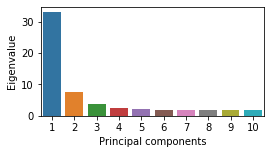

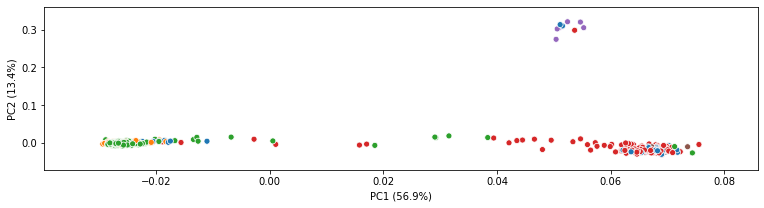

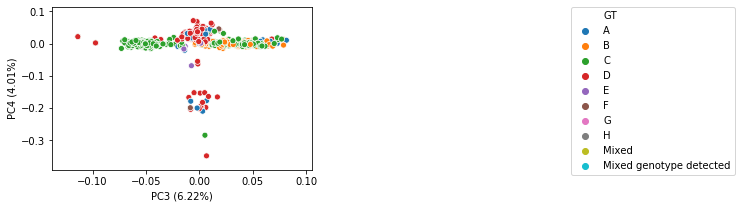

In [15]:
host.plot_plink_pca(setup.PATH_HOST_CLEAN_DATA, n_pcs=4, hue_col='GT',
                   bbox_to_anchor=(2, 1))

### Country

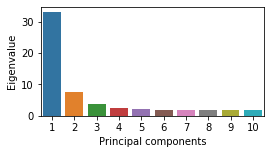

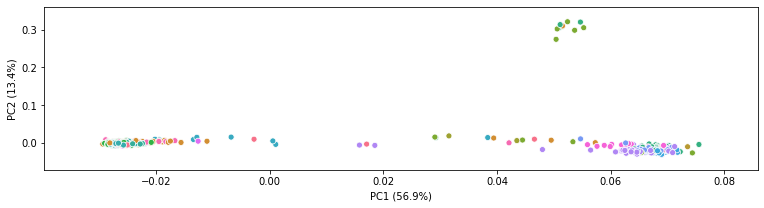

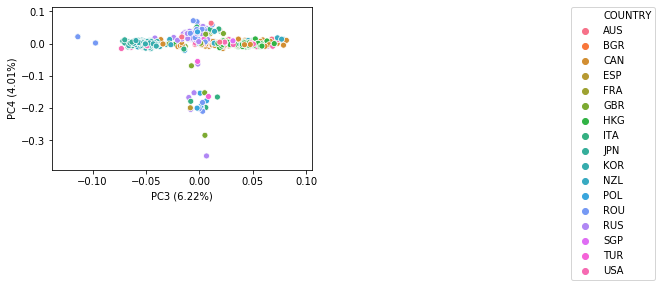

In [16]:
host.plot_plink_pca(setup.PATH_HOST_CLEAN_DATA, n_pcs=4, hue_col='COUNTRY',
                   bbox_to_anchor=(2, 1))

### Race


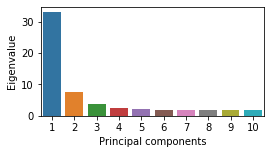

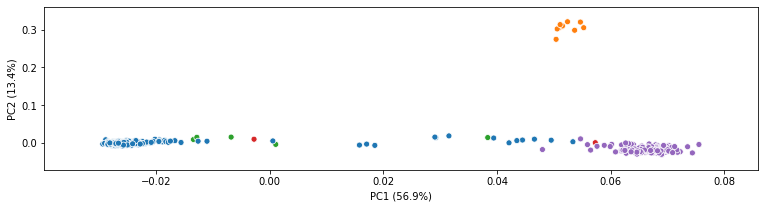

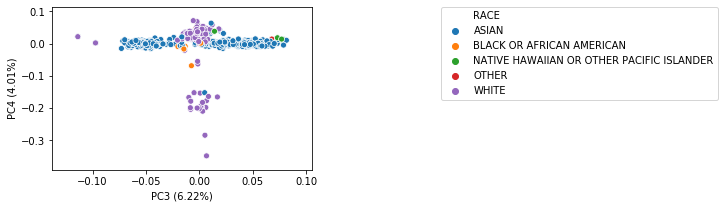

In [19]:
host.plot_plink_pca(setup.PATH_HOST_CLEAN_DATA, n_pcs=4, hue_col='RACE',
                   bbox_to_anchor=(1.5, 1))